# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [9]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

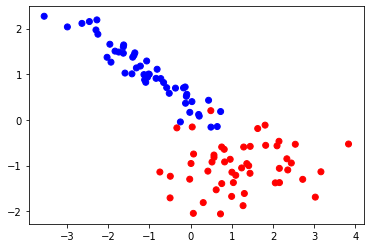

In [6]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter([x[0] for x in clf_data], [x[1] for x in clf_data], c = clf_target, cmap = colors)

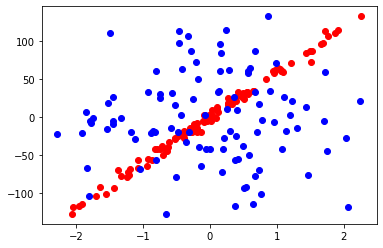

In [7]:
pylab.scatter([x[1] for x in reg_data], reg_target, color = 'r')
pylab.scatter([x[0] for x in reg_data], reg_target, color = 'b')

In [14]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [17]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [20]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [21]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(loss='log', random_state=1)

In [22]:
predictions = classifier.predict(clf_test_data)

In [23]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [24]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [25]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]


In [26]:
print(probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 2.90779994e-09]
 [9.99990982e-01 9.01818055e-06]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.01333183e-14]
 [5.16838702e-07 9.99999483e-01]
 [6.66133815e-16 1.00000000e+00]
 [1.00000000e+00 6.21822808e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999998e-01 2.30155106e-09]
 [9.99999697e-01 3.03286910e-07]
 [4.06373790e-03 9.95936262e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.84496051e-09 9.99999990e-01]
 [1.00000000e+00 2.85780656e-10]
 [9.96681204e-01 3.31879568e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.58409203e-15]
 [1.00000000e+00 1.62031980e-14]
 [7.25799421e-11 1.00000000e+00]
 [9.99999999e-01 1.11892650e-09]
 [9.99999727e-01 2.73211585e-07]
 [8.97506031e-01 1.02493969e-01]
 [1.00000000e+00 1.48816090e-12]
 [9.99999504e-01 4.96472653e-07]
 [9.94751478e-01 5.24852191e-03]
 [5.83291617e-01 4.16708383e-01]
 [8.46989145e-12 1.00000000e+00]
 [3.20094202e-02 9.67990580e-01]
 [1.00000000e+00 2.85626467e-13]]


#### accuracy

In [27]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [28]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [31]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 1 11]]


In [32]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

28

In [33]:
matrix.diagonal().sum()

28

#### precision 

In [34]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [35]:
metrics.precision_score(clf_test_labels, predictions)

0.9166666666666666

#### recall

In [36]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [37]:
metrics.recall_score(clf_test_labels, predictions)

0.9166666666666666

#### f1

In [38]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [ ]:
metrics.f1_score(clf_test_labels, predictions)

#### classification report

In [ ]:
print metrics.classification_report(clf_test_labels, predictions)

#### ROC curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

In [ ]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [ ]:
metrics.roc_auc_score(clf_test_labels, predictions)

In [ ]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

#### PR AUC

In [ ]:
metrics.average_precision_score(clf_test_labels, predictions)

#### log_loss

In [ ]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [ ]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [ ]:
regressor.fit(reg_train_data, reg_train_labels)

In [ ]:
reg_predictions = regressor.predict(reg_test_data)

In [ ]:
print reg_test_labels

In [ ]:
print reg_predictions

#### mean absolute error

In [ ]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

#### mean squared error

In [ ]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

#### root mean squared error

In [ ]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

#### r2 score

In [ ]:
metrics.r2_score(reg_test_labels, reg_predictions)